In [2]:
import numpy as np
import pandas as pd
import glob
import os, subprocess, re
import nrrd

In [3]:
def find_line(data, searchstring):
    return [i for i, item in enumerate(data) if re.search(searchstring+":"+' *', item)][0]

def extract_meta_data(filelist, df_data, annotated):
    for file in filelist:
        name = file.split("/")[-1][:-5]
        if annotated: name += "_annotated"
        meta = subprocess.check_output(f"head -15 {file}", shell=True)
        meta = meta.decode("utf-8").split("\n")

        df_data[0].append(name)
        df_data[1].append(annotated)
        df_data[2].append(int(meta[find_line(meta, "sizes")].split(" ")[1]))
        df_data[3].append(int(meta[find_line(meta, "sizes")].split(" ")[2]))
        df_data[4].append(int(meta[find_line(meta, "sizes")].split(" ")[3]))

        df_data[5].append(np.array([float(value) for value in meta[find_line(meta, "space directions")].split(" ")[2].strip("()").split(",")]).max())
        df_data[6].append(np.array([float(value) for value in meta[find_line(meta, "space directions")].split(" ")[3].strip("()").split(",")]).max())
        df_data[7].append(np.array([float(value) for value in meta[find_line(meta, "space directions")].split(" ")[4].strip("()").split(",")]).max())

        df_data[8].append([float(value) for value in meta[find_line(meta, "space origin")].split(" ")[2].strip("()").split(",")][0])
        df_data[9].append([float(value) for value in meta[find_line(meta, "space origin")].split(" ")[2].strip("()").split(",")][1])
        df_data[10].append([float(value) for value in meta[find_line(meta, "space origin")].split(" ")[2].strip("()").split(",")][2])

    return df_data

In [4]:
# analyze nrrd image sizes and metadata of all normal datasets

df_header = ["name", "annotated", "size_x", "size_y", "size_z", "space_direction_x", "space_direction_y", "space_direction_z", "space_origin_x", "space_origin_y", "space_origin_z"]
df_data = [ [] for i in range(len(df_header)) ]

filelist = sorted(glob.glob("../../data/ASOCA/Normal/CTCA/*.nrrd"))
df_data = extract_meta_data(filelist, df_data, annotated=False)

filelist = sorted(glob.glob("../../data/ASOCA/Normal/CTCA/*.nrrd"))
df_data = extract_meta_data(filelist, df_data, annotated=True)

df = {}
for i, header in enumerate(df_header): df[header] = df_data[i]
df = pd.DataFrame(df)


# including diseased datasets
filelist = sorted(glob.glob("../../data/ASOCA/Diseased/CTCA/*.nrrd"))
df_data = extract_meta_data(filelist, df_data, annotated=False)

filelist = sorted(glob.glob("../../data/ASOCA/Diseased/CTCA/*.nrrd"))
df_data = extract_meta_data(filelist, df_data, annotated=True)

df_wDiseased = {}
for i, header in enumerate(df_header): df_wDiseased[header] = df_data[i]
df_wDiseased = pd.DataFrame(df_wDiseased)
df_wDiseased

,name,annotated,size_x,size_y,size_z,space_direction_x,space_direction_y,space_direction_z,space_origin_x,space_origin_y,space_origin_z
0,Normal_1,False,512,512,204,0.416016,0.416016,0.625,-116.800003,-120.000000,-196.875
1,Normal_10,False,512,512,209,0.435547,0.435547,0.625,-90.500000,-130.100006,-260.000
2,Normal_11,False,512,512,212,0.306641,0.306641,0.625,-60.400002,-96.099998,-219.875
3,Normal_12,False,512,512,206,0.369141,0.369141,0.625,-75.699997,-94.500000,-193.125
4,Normal_13,False,512,512,199,0.333984,0.333984,0.625,-62.400002,-105.699997,-224.500
...,...,...,...,...,...,...,...,...,...,...,...
75,Diseased_5_annotated,True,512,512,224,0.445312,0.445312,0.625,-92.300003,-167.399994,-212.875
76,Diseased_6_annotated,True,512,512,224,0.441406,0.441406,0.625,-97.099998,-155.300003,-224.375
77,Diseased_7_annotated,True,512,512,224,0.394531,0.394531,0.625,-95.900002,-111.099998,-225.125
78,Diseased_8_annotated,True,512,512,224,0.398438,0.398438,0.625,-85.699997,-131.699997,-235.375


In [5]:
df.describe()

,size_x,size_y,size_z,space_direction_x,space_direction_y,space_direction_z,space_origin_x,space_origin_y,space_origin_z
count,40.0,40.0,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000
mean,512.0,512.0,208.700000,0.378613,0.378613,6.250000e-01,-84.965000,-115.590000,-214.287500
std,0.0,0.0,14.088002,0.030981,0.030981,1.508496e-16,13.730007,13.916194,21.210979
min,512.0,512.0,168.000000,0.306641,0.306641,6.250000e-01,-116.800003,-153.000000,-260.000000
25%,512.0,512.0,203.500000,0.357422,0.357422,6.250000e-01,-92.375002,-123.124998,-222.156250
50%,512.0,512.0,210.000000,0.381835,0.381835,6.250000e-01,-85.849998,-112.700001,-217.000000
75%,512.0,512.0,218.750000,0.401367,0.401367,6.250000e-01,-75.549997,-105.699997,-200.187500
max,512.0,512.0,224.000000,0.435547,0.435547,6.250000e-01,-60.400002,-94.500000,-172.375000


In [6]:
df_wDiseased.describe()

,size_x,size_y,size_z,space_direction_x,space_direction_y,space_direction_z,space_origin_x,space_origin_y,space_origin_z
count,80.0,80.0,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.000000,80.000000
mean,512.0,512.0,214.950000,0.405193,0.405193,6.250000e-01,-87.368875,-129.643225,-214.275000
std,0.0,0.0,14.593132,0.043747,0.043747,1.184999e-16,12.623986,22.687234,19.154584
min,512.0,512.0,168.000000,0.306641,0.306641,6.250000e-01,-117.099998,-173.399994,-260.000000
25%,512.0,512.0,208.500000,0.380371,0.380371,6.250000e-01,-93.991253,-148.875000,-224.656250
50%,512.0,512.0,224.000000,0.396485,0.396485,6.250000e-01,-88.100002,-124.464500,-215.500000
75%,512.0,512.0,224.000000,0.438477,0.438477,6.250000e-01,-79.799999,-111.400000,-206.250000
max,512.0,512.0,224.000000,0.494141,0.494141,6.250000e-01,-60.400002,-94.500000,-172.375000


(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,
         0.,  0.,  2.,  0.,  4.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
         4.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 48.]),
 array([168.  , 168.56, 169.12, 169.68, 170.24, 170.8 , 171.36, 171.92,
        172.48, 173.04, 173.6 , 174.16, 174.72, 175.28, 175.84, 176.4 ,
        176.96, 177.52, 178.08, 178.64, 179.2 , 179.76, 180.32, 180.88,
        181.44, 182.  , 182.56, 183.12, 183.68, 184.24, 184.8 , 185.36,
        185.92, 186.48, 187.04, 187.6 , 188.16, 188.72, 189.28, 189.84,
        190.4 , 190.96, 191.52, 192.08, 192.64, 193.2 , 193.76, 194.32,
  

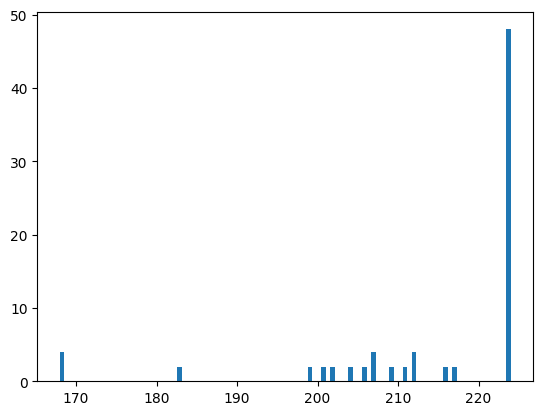

In [8]:
import matplotlib.pyplot as plt
plt.hist(df_wDiseased.size_z, bins=100)

In [ ]:
## --> For preprocessing: resize to mean size_z=215 in z-direction

# space origin: different values, propabely since hearts are at different positions relative to the LPS fixpoint of the patients
# space direction: relatively similar, 10% std in x,y. the same in z. Close enough to not do Spacingd?

In [ ]:
### load all image values (contrast) and get mean, std for normalization:
filelist = sorted(glob.glob("../../data/ASOCA/*/CTCA/*.nrrd"))

all_data = np.array([])
for file in filelist:
    data, header = nrrd.read(file)
    all_data = np.append(all_data, data.flatten())

all_data


## todo! Only for train data!!

array([-3024., -3023., -3023., ..., -3024., -3024., -3024.])

In [ ]:
# use this to scale images to mean=0, std=1
np.mean(all_data), np.std(all_data)

(-848.3641349994796, 1201.188331923214)

In [ ]:
## for scaleIntensityRanged
np.min(all_data), np.max(all_data)

(-3435.0, 3679.0)